In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import r2_score

In [2]:
def load_model_data(model_name):
    """Load all saved data for a model"""
    data = {
        'predictions': np.load(f"{model_name}_predictions.npy"),
        'actuals': np.load(f"{model_name}_actuals.npy"),
        'train_losses': np.load(f"{model_name}_train_losses.npy"),
        'val_losses': np.load(f"{model_name}_val_losses.npy"),
        'test_losses': np.load(f"{model_name}_test_losses.npy"),
        'kept_indices': np.load(f"{model_name}_kept_indices.npy", allow_pickle=True),
        'removed_indices': np.load(f"{model_name}_removed_indices.npy", allow_pickle=True)
    }
    print(f"Loaded {model_name} data:")
    print(f"predictions shape: {data['predictions'].shape}")
    print(f"actuals shape: {data['actuals'].shape}")
    # for k, v in data.items():
    #     print(f"{k}: {v.shape if hasattr(v, 'shape') else len(v)}")
    return data

model_name = os.path.join("lstm_nsp", "lstm_nsp_85_5", f"lstm_nsp_85_5")
data = load_model_data(model_name)

Loaded lstm_nsp/lstm_nsp_85_5/lstm_nsp_85_5 data:
predictions shape: (9108, 5, 6)
actuals shape: (9108, 5, 6)


In [24]:
model_dirs = ["lstm_nsp_85_5", "lstm_nsp_80_10", "lstm_nsp_70_20"]
pred_lens = [5, 10, 20]
input_lens = [85,80,70]

Loaded lstm_nsp/lstm_nsp_85_5/lstm_nsp_85_5 data:
predictions shape: (9108, 5, 6)
actuals shape: (9108, 5, 6)
Loaded lstm_nsp/lstm_nsp_80_10/lstm_nsp_80_10 data:
predictions shape: (9108, 10, 6)
actuals shape: (9108, 10, 6)
Loaded lstm_nsp/lstm_nsp_70_20/lstm_nsp_70_20 data:
predictions shape: (9108, 20, 6)
actuals shape: (9108, 20, 6)


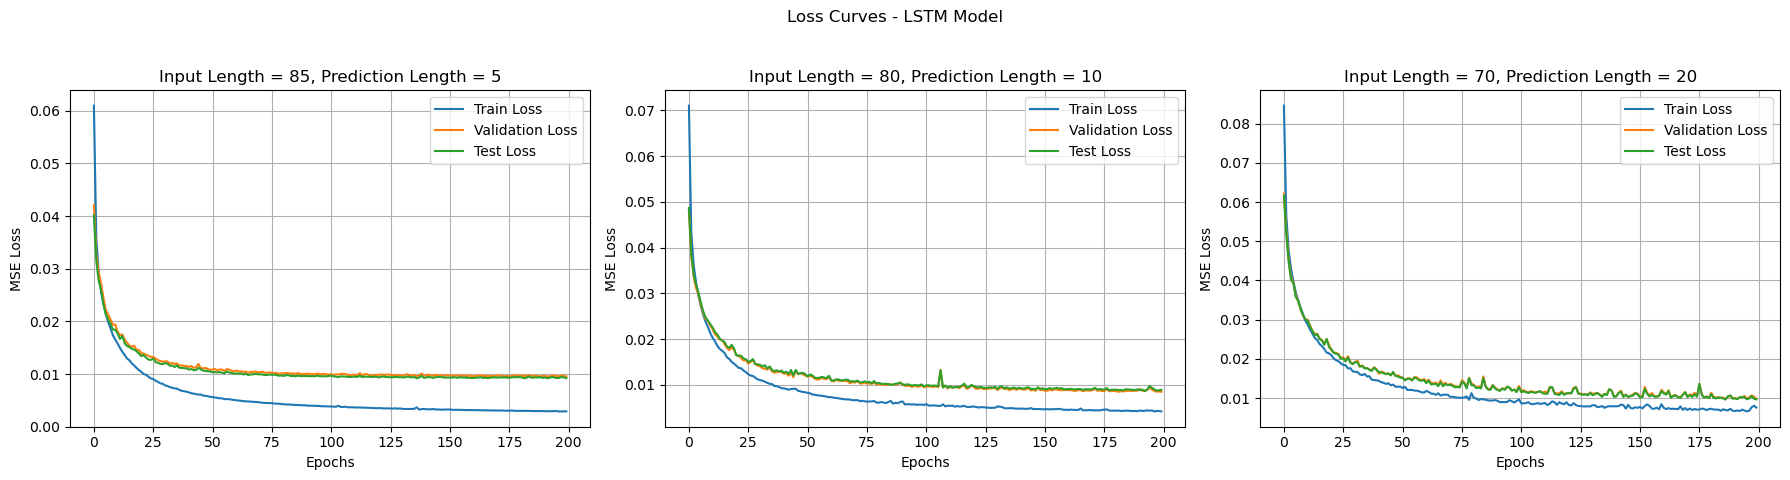

In [20]:
def plot_loss_curves_comparison(model_paths, input_lengths, pred_lengths):
    """Plot training/validation/test loss curves for multiple prediction lengths"""
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    for i, (path, input_len, pred_len) in enumerate(zip(model_paths, input_lengths, pred_lengths)):
        model_name = os.path.join("lstm_nsp", path, path)
        data = load_model_data(model_name)
        
        axs[i].plot(data['train_losses'], label='Train Loss')
        if data['val_losses'] is not None:
            axs[i].plot(data['val_losses'], label='Validation Loss')
        if data['test_losses'] is not None:
            axs[i].plot(data['test_losses'], label='Test Loss')
        
        axs[i].set_title(f'Input Length = {input_len}, Prediction Length = {pred_len}')
        axs[i].set_xlabel('Epochs')
        axs[i].set_ylabel('MSE Loss')
        axs[i].legend()
        axs[i].grid(True)

    plt.suptitle('Loss Curves - LSTM Model')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    #plt.savefig("loss_comparison_5_10_20.png", bbox_inches='tight')
    plt.show()

plot_loss_curves_comparison(model_dirs, input_lens, pred_lens)

Loaded lstm_nsp/lstm_nsp_85_5/lstm_nsp_85_5 data:
predictions shape: (9108, 5, 6)
actuals shape: (9108, 5, 6)
Loaded lstm_nsp/lstm_nsp_80_10/lstm_nsp_80_10 data:
predictions shape: (9108, 10, 6)
actuals shape: (9108, 10, 6)
Loaded lstm_nsp/lstm_nsp_70_20/lstm_nsp_70_20 data:
predictions shape: (9108, 20, 6)
actuals shape: (9108, 20, 6)


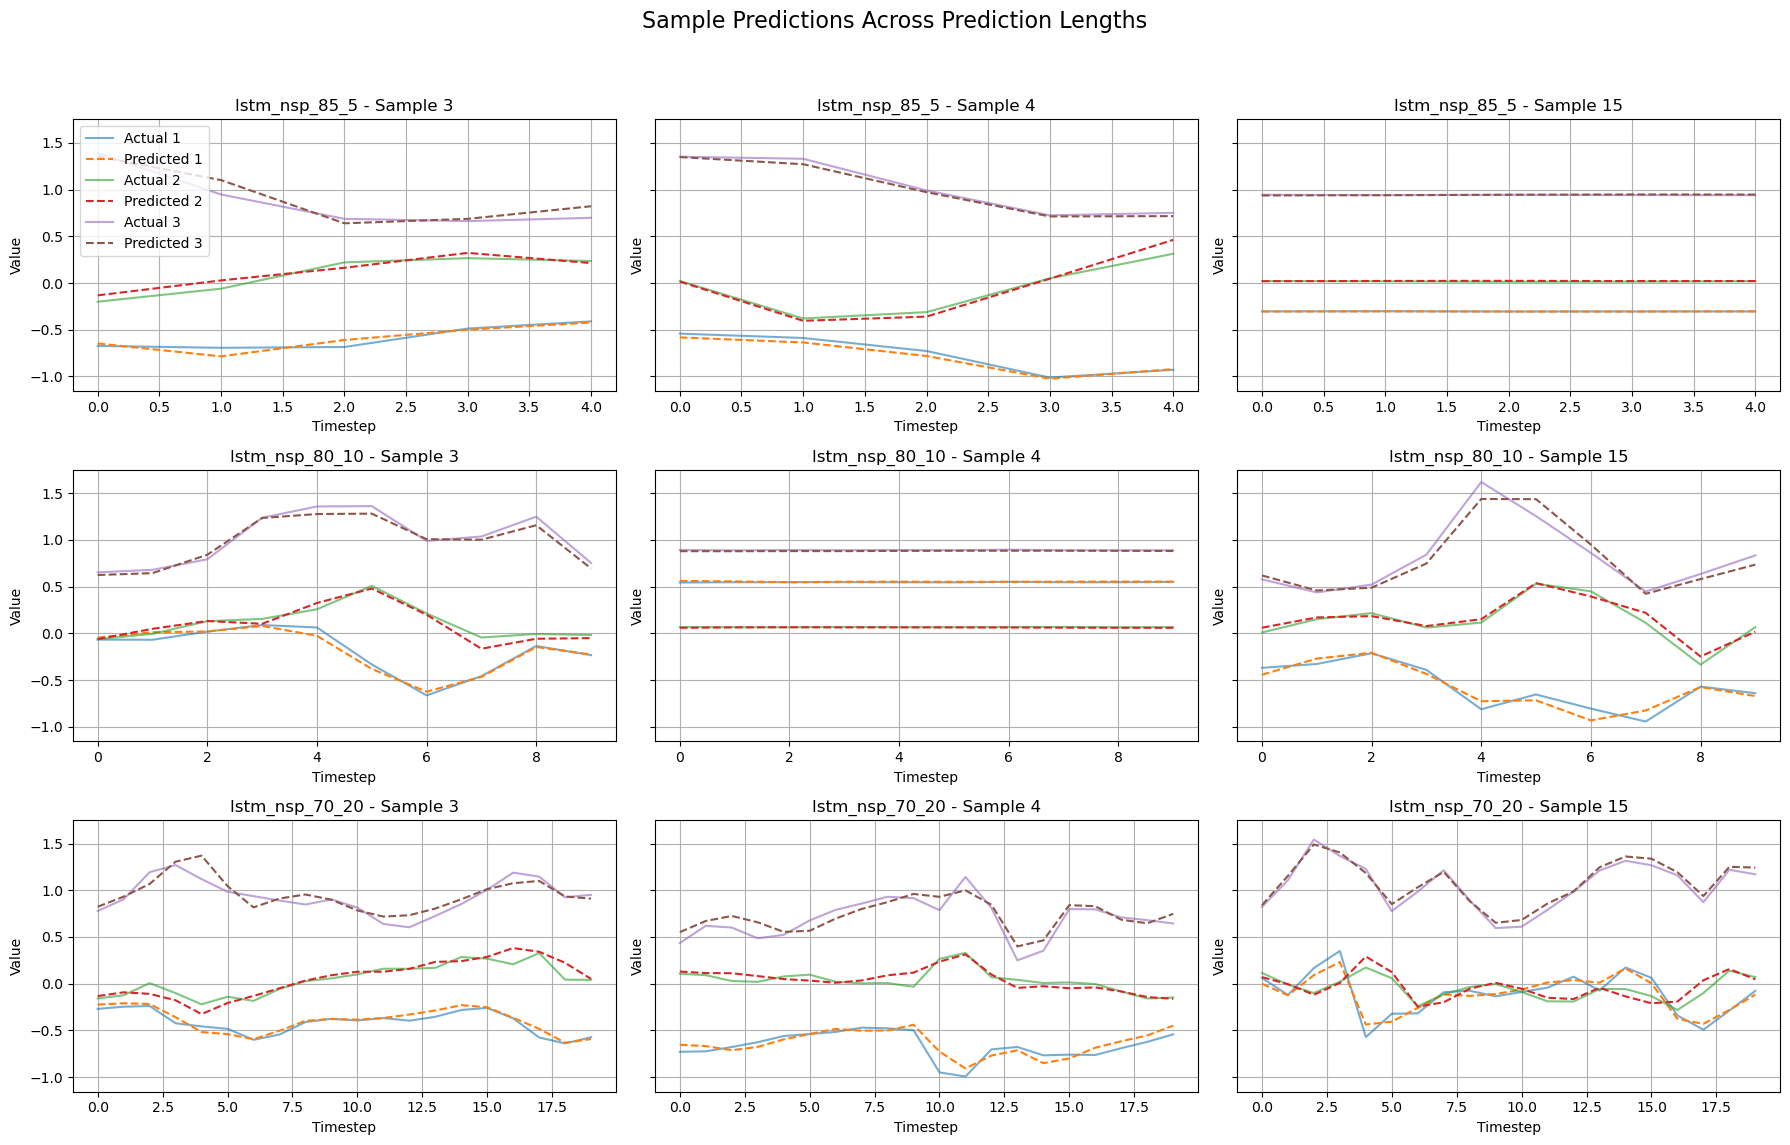

In [67]:
def plot_sample_predictions_comparison(model_paths, input_lengths, pred_lengths, sample_indices=[0, 1, 2], sharey=True):
    """Plot sample predictions from multiple models"""
    n_samples = len(sample_indices)
    fig, axs = plt.subplots(len(model_paths), n_samples, figsize=(6 * n_samples, 4 * len(model_paths)), sharey=sharey)

    for row, (path, input_len, pred_len) in enumerate(zip(model_paths, input_lengths, pred_lengths)):
        model_name = os.path.join("lstm_nsp", path, path)
        data = load_model_data(model_name)
        preds, actuals = data['predictions'], data['actuals']

        for col, sample_idx in enumerate(sample_indices):
            ax = axs[row][col] if len(model_paths) > 1 else axs[col]
            for axis in range(3):  # First 3 axes
                ax.plot(actuals[sample_idx, :, axis], label=f'Actual {axis+1}', alpha=0.6)
                ax.plot(preds[sample_idx, :, axis], '--', label=f'Predicted {axis+1}')
                ax.set_xlabel("Timestep")
                ax.set_ylabel("Value")
               
            # if row == 2:  
            #     ax.set_xlim(15, 19)
            # if row == 1: 
            #     ax.set_xlim(5, 9)

            # ax.set_ylim(-0.6, 1.8)
            ax.set_title(f'{path} - Sample {sample_idx}')
            ax.grid(True)
            if row == 0 and col == 0:
                ax.legend()
    
    plt.suptitle("Sample Predictions Across Prediction Lengths", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    #plt.savefig("sample_predictions_comparison.png", bbox_inches='tight')
    plt.show()

plot_sample_predictions_comparison(model_dirs, input_lens, pred_lens, sample_indices=[3, 4, 15], sharey=True)

Loaded lstm_nsp/lstm_nsp_85_5/lstm_nsp_85_5 data:
predictions shape: (9108, 5, 6)
actuals shape: (9108, 5, 6)
Loaded lstm_nsp/lstm_nsp_80_10/lstm_nsp_80_10 data:
predictions shape: (9108, 10, 6)
actuals shape: (9108, 10, 6)
Loaded lstm_nsp/lstm_nsp_70_20/lstm_nsp_70_20 data:
predictions shape: (9108, 20, 6)
actuals shape: (9108, 20, 6)


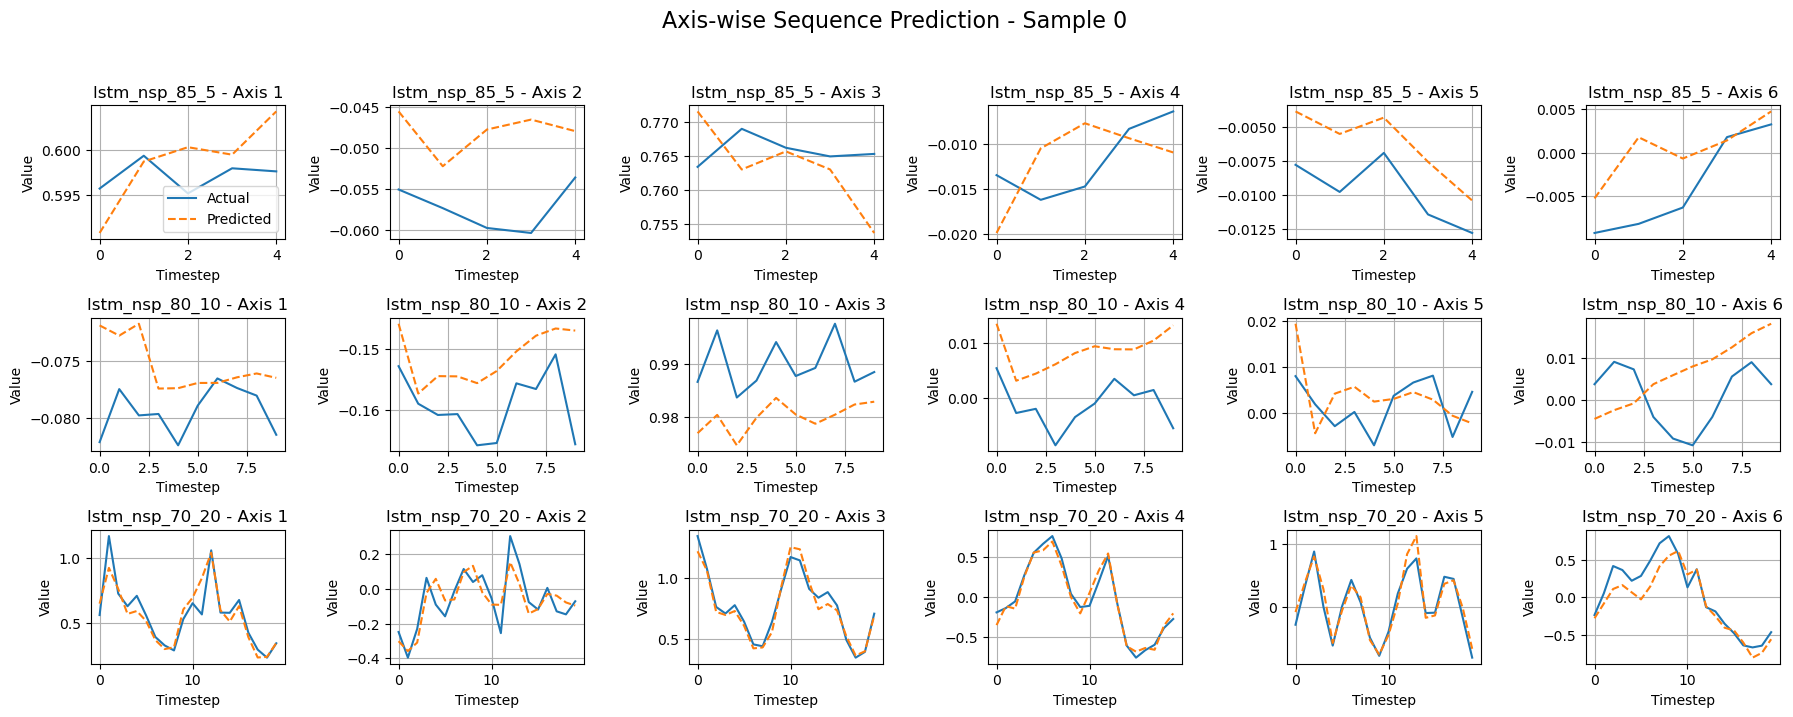

In [72]:
def plot_sample_sequence_comparison(model_paths, input_lengths, pred_lengths, sample_idx=0, sharey=True):
    """Compare timestep predictions for all axes from different models"""
    fig, axs = plt.subplots(len(model_paths), 6, figsize=(18, 2.5 * len(model_paths)), sharey=sharey)

    for row, (path, input_len, pred_len) in enumerate(zip(model_paths, input_lengths, pred_lengths)):
        model_name = os.path.join("lstm_nsp", path, path)
        data = load_model_data(model_name)
        preds, actuals = data['predictions'], data['actuals']

        for axis in range(6):
            ax = axs[row][axis] if len(model_paths) > 1 else axs[axis]
            ax.plot(actuals[sample_idx, :, axis], label="Actual")
            ax.plot(preds[sample_idx, :, axis], '--', label="Predicted")
            ax.set_title(f"{path} - Axis {axis+1}")
            ax.set_xlabel("Timestep")
            ax.set_ylabel("Value")
            ax.grid(True)
            if row == 0 and axis == 0:
                ax.legend()

    plt.suptitle(f"Axis-wise Sequence Prediction - Sample {sample_idx}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    #plt.savefig("sample_sequence_comparison.png", bbox_inches='tight')
    plt.show()

plot_sample_sequence_comparison(model_dirs, input_lens, pred_lens, sample_idx=0, sharey=False)

Loaded lstm_nsp/lstm_nsp_85_5/lstm_nsp_85_5 data:
predictions shape: (9108, 5, 6)
actuals shape: (9108, 5, 6)
Loaded lstm_nsp/lstm_nsp_80_10/lstm_nsp_80_10 data:
predictions shape: (9108, 10, 6)
actuals shape: (9108, 10, 6)
Loaded lstm_nsp/lstm_nsp_70_20/lstm_nsp_70_20 data:
predictions shape: (9108, 20, 6)
actuals shape: (9108, 20, 6)


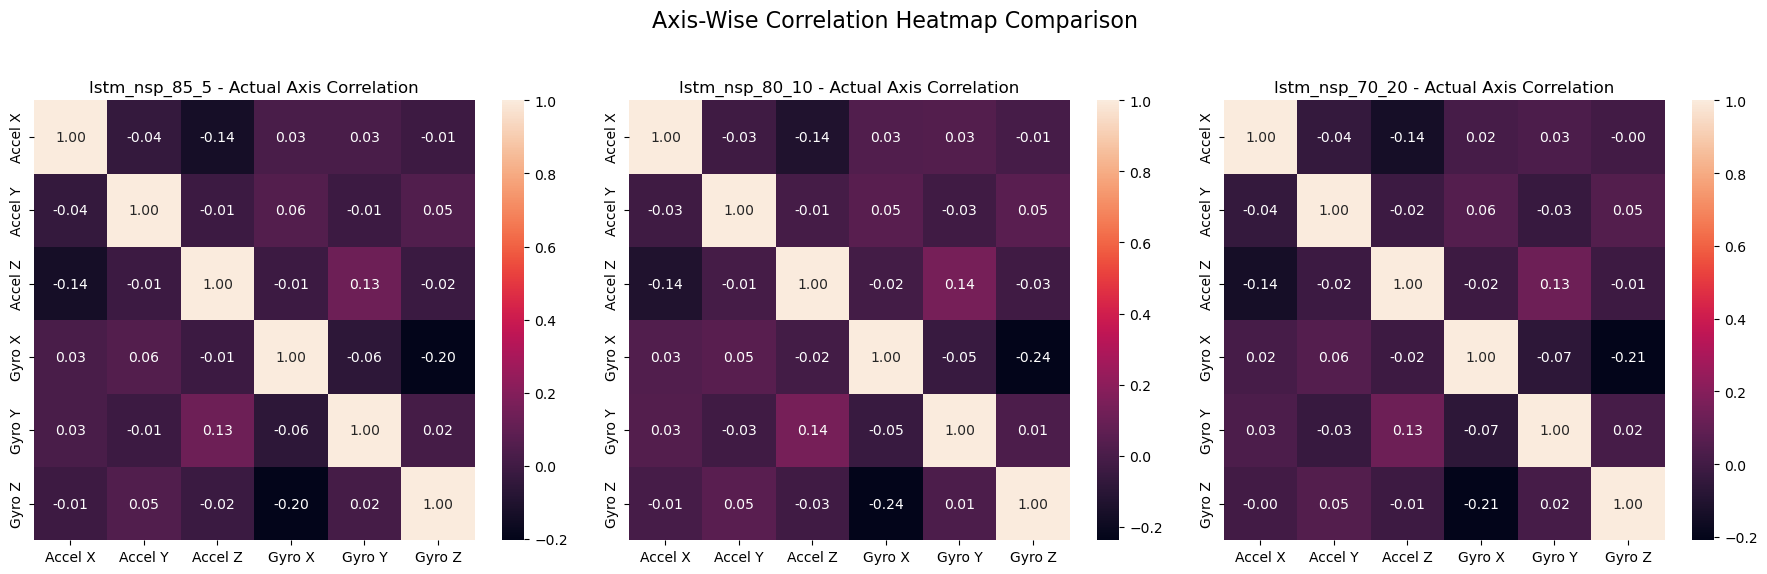

In [49]:
def plot_axis_correlation_heatmap_comparison(model_paths, input_lengths, pred_lengths):
    """Compare correlation heatmaps from actual data across models"""
    fig, axs = plt.subplots(1, len(model_paths), figsize=(6 * len(model_paths), 6))

    axis_names = ['Accel X', 'Accel Y', 'Accel Z', 'Gyro X', 'Gyro Y', 'Gyro Z']

    for i, (path, input_len, pred_len) in enumerate(zip(model_paths, input_lengths, pred_lengths)):
        model_name = os.path.join("lstm_nsp", path, path)
        data = load_model_data(model_name)
        reshaped = data['actuals'].reshape(-1, 6)
        corr_matrix = np.corrcoef(reshaped.T)

        ax = axs[i] if len(model_paths) > 1 else axs
        sns.heatmap(corr_matrix, annot=True, xticklabels=axis_names, yticklabels=axis_names, fmt=".2f", ax=ax)
        ax.set_title(f'{path} - Actual Axis Correlation')

    plt.suptitle("Axis-Wise Correlation Heatmap Comparison", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    #plt.savefig("axis_correlation_comparison.png", bbox_inches='tight')
    plt.show()

plot_axis_correlation_heatmap_comparison(model_dirs, input_lens, pred_lens)